In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from pathlib import Path

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Found 386 files belonging to 2 classes.
Found 400 files belonging to 2 classes.


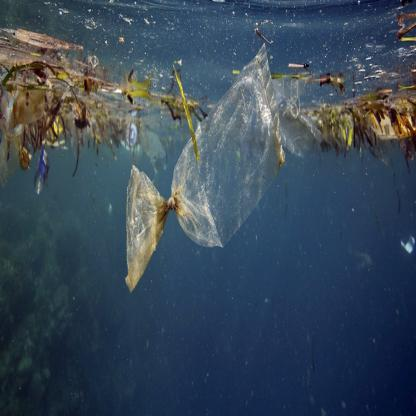

In [ ]:
data_dir = "/content/drive/MyDrive/DeepTrash-Yolov5/train/"
img_height = 416
img_width = 416
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

data_dir_valid = "/content/drive/MyDrive/DeepTrash-Yolov5/valid/"

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_valid,
    seed=123,
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Dirty = list(Path(data_dir + '/Dirty').glob('*'))
PIL.Image.open(str(Dirty[1]))

In [ ]:
class_names = train_ds.class_names
print(class_names)

['Clean', 'Dirty']


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [ ]:
!file {str(Clean[1])}

/content/drive/MyDrive/DeepTrash-Yolov5/valid/Clean_valid/no_plastic_2.jpg: JPEG image data, JFIF standard 1.01, aspect ratio, density 1x1, segment length 16, baseline, precision 8, 5635x3450, components 3


In [ ]:
# normalization_layer = layers.Rescaling(1./255)

# normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x),y))
# print(normalized_ds)
# # image_batch, labels_batch = next(iter(normalized_ds))
# # first_image = image_batch[0]

In [ ]:
num_classes = len(class_names)

model = Sequential(
    [
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16,3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
    ]
)


In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
# Clean = list(Path(data_dir_valid + '/Clean_valid').glob('*'))
# #PIL.Image.open(str(Clean[1]))
# for i in [0:]
# Dirty = list(Path(data_dir_valid + '/Dirty_valid').glob('*'))
# Clean = list(Path(data_dir_valid + '/Clean_valid').glob('*'))
# for i in range(0,203):
#   !file {str(Clean[i])}
# model.summary()
# print(train_ds)
epochs=7
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/7
13/13 [==============================] - 132s 9s/step - loss: 1.3498 - accuracy: 0.8264 - val_loss: 0.1654 - val_accuracy: 0.9625
Epoch 2/7
13/13 [==============================] - 114s 9s/step - loss: 0.1456 - accuracy: 0.9611 - val_loss: 0.1001 - val_accuracy: 0.9900
Epoch 3/7
13/13 [==============================] - 118s 9s/step - loss: 0.1630 - accuracy: 0.9663 - val_loss: 0.0438 - val_accuracy: 0.9875
Epoch 4/7
13/13 [==============================] - 113s 9s/step - loss: 0.1033 - accuracy: 0.9689 - val_loss: 0.0729 - val_accuracy: 0.9875
Epoch 5/7
13/13 [==============================] - 120s 10s/step - loss: 0.0999 - accuracy: 0.9715 - val_loss: 0.0647 - val_accuracy: 0.9775
Epoch 6/7
13/13 [==============================] - 118s 9s/step - loss: 0.0913 - accuracy: 0.9741 - val_loss: 0.0619 - val_accuracy: 0.9875
Epoch 7/7
13/13 [==============================] - 114s 9s/step - loss: 0.0762 - accuracy: 0.9793 - val_loss: 0.0517 - val_accuracy: 0.9900


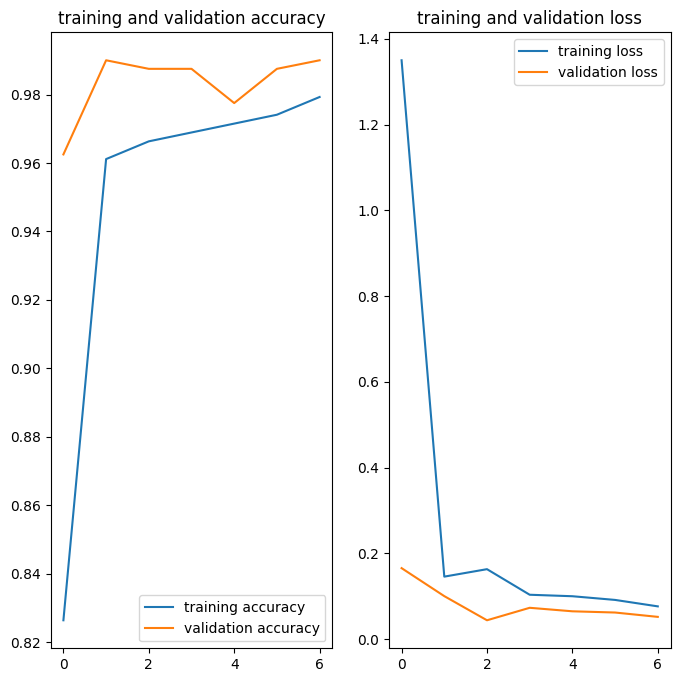

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range  = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='training accuracy')
plt.plot(epochs_range,val_acc,label="validation accuracy")
plt.legend(loc='lower right')
plt.title('training and validation accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='training loss')
plt.plot(epochs_range, val_loss, label='validation loss')
plt.legend(loc='upper right')
plt.title('training and validation loss')
plt.show()

Name: keras
Version: 2.15.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: tensorflow
